## import liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [3]:
raw_data = pd.read_csv('T-20 World cup 2022.csv')
raw_data.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


In [4]:
raw_data.columns

Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')

**Column Meanings**


**Match Details:**

- match_id: Unique identifier for each match.
- match_name: Name of the match (e.g., "ENG v PAK").
- home_team: Team playing at home.
- away_team: Team playing away.
- current_innings: Indicates which team is currently batting (e.g., "PAK").
- innings_id: Unique identifier for each innings within a match.
- over: Current over being played (1-20).
- ball: Ball number within the current over (1-6).

**Player Performance:**
- batsman1_id, batsman2_id: Unique identifiers for the two batsmen.
- batsman1_name, batsman2_name: Names of the two batsmen.
- batsman1_runs, batsman2_runs: Number of runs scored by each batsman.
- batsman1_balls, batsman2_balls: Number of balls faced by each batsman.
- bowler1_id, bowler2_id : Unique identifiers for the bowlers.
- bowler1_name, bowler2_name : Names of the bowlers.
- bowler1_overs, bowler2_overs : Number of overs bowled by each bowler.
- bowler1_runs, bowler2_runs : Number of runs conceded by each bowler.
- bowler1_wkts, bowler2_wkts : Number of wickets taken by each bowler.

**Match Events:**

- runs: Number of runs scored in that particular ball.
- isBoundary: Indicates if the ball resulted in a boundary (four or six runs).
- isWide, isNoball: Indicates if the ball was a wide or a no-ball.
- wicket_id (if applicable): Unique identifier for a wicket (dismissal) event.
- wkt_batsman_name (if applicable): Name of the batsman dismissed.
- wkt_bowler_name (if applicable): Name of the bowler who took the wicket.
- wkt_batsman_runs (if applicable): Number of runs scored by the dismissed batsman.
- wkt_batsman_balls (if applicable): Number of balls faced by the dismissed batsman.
- wkt_text (if applicable): Description of the wicket-taking event.
- isRetiredHurt: Indicates if a batsman retired hurt.

Commentary :
- text: Commentary text associated with the ball or event.
- preText, postText: Commentary text before and after the ball or event .

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

In [6]:
raw_data.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

In [6]:
raw_data.isnull().sum()/raw_data.shape[0]

comment_id           0.000000
match_id             0.000000
match_name           0.000000
home_team            0.000000
away_team            0.000000
current_innings      0.000000
innings_id           0.000000
over                 0.000000
ball                 0.000000
runs                 0.000000
shortText            0.000000
isBoundary           0.000000
isWide               0.000000
isNoball             0.000000
batsman1_id          0.000000
batsman1_name        0.000000
batsman1_runs        0.000000
batsman1_balls       0.000000
bowler1_id           0.000000
bowler1_name         0.000000
bowler1_overs        0.000000
bowler1_maidens      0.000000
bowler1_runs         0.000000
bowler1_wkts         0.000000
batsman2_id          0.000000
batsman2_name        0.000000
batsman2_runs        0.000000
batsman2_balls       0.000000
bowler2_id           0.053597
bowler2_name         0.053597
bowler2_overs        0.053597
bowler2_maidens      0.053597
bowler2_runs         0.053597
bowler2_wk

there is a lot of null data in : wicket_id  ,wkt_batsman_name    ,wkt_bowler_name      ,wkt_batsman_runs     ,wkt_batsman_balls ,wkt_text             

<Axes: >

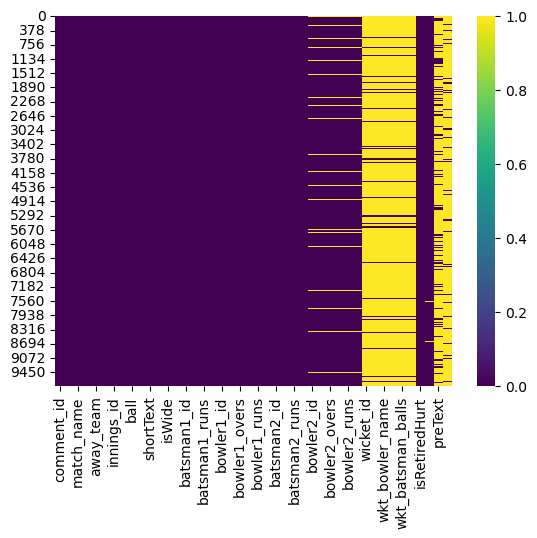

In [8]:
sns.heatmap(raw_data.isnull(), cmap='viridis')



In [ ]:
# Create the heatmap
sns.heatmap(raw_data.isnull(), cmap='viridis')

# Save the heatmap as an image file
plt.savefig('heatmap.png')

# Display the plot
plt.show()

In [ ]:
raw_data.dtypes


In [ ]:
raw_data.describe()

## Data Exploration

In [ ]:
# Explore team performances
team_performance = raw_data.groupby('match_name')[['runs']].sum()
print(team_performance)

In [ ]:
# Explore player performances
player_performance = raw_data.groupby('batsman1_name')[['batsman1_runs']].sum()
print(player_performance)

In [ ]:
# Explore key events
key_events = raw_data[['match_name', 'shortText']].value_counts()
print(key_events)

In [ ]:
# Player statistics
player_stats = raw_data.groupby('batsman1_name').agg({
    'batsman1_runs': 'sum',
    'batsman1_balls': 'sum',
    'bowler1_wkts': 'sum',
    'bowler1_runs': 'sum'
})
print(player_stats)

In [ ]:


# Factors contributing to team success/failure
boundary_events = raw_data.loc[raw_data['isBoundary'] == 1]

wicket_events = raw_data.loc[raw_data['wicket_id'].notna()]

In [ ]:
# Individual and team performances
standout_players = player_stats.sort_values(by='batsman1_runs', ascending=False).head(10)
print(standout_players)

In [ ]:
top_wicket_takers = player_stats.sort_values(by='bowler1_wkts', ascending=False).head(10)
print(top_wicket_takers)

In [ ]:
# Visualization of match outcomes
match_outcomes = raw_data.groupby('match_name')['runs'].sum()
plt.hist(match_outcomes)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Match Outcomes')
plt.show()

In [9]:
df=raw_data.copy(deep=True)

In [10]:

df['runs'] = pd.to_numeric(df['runs'], errors='coerce')

In [ ]:
df.columns

In [11]:
df['match_id'].unique() 


array([1298179, 1298178, 1298177, 1298176, 1298175, 1298174, 1298173,
       1298172, 1298171, 1298170, 1298169, 1298168, 1298167, 1298166,
       1298165, 1298164, 1298163, 1298162, 1298161, 1298158, 1298157,
       1298156, 1298154, 1298153, 1298152, 1298151, 1298150, 1298149,
       1298148, 1298147, 1298146, 1298145, 1298144, 1298143, 1298142,
       1298141, 1298140, 1298139, 1298138, 1298137, 1298136, 1298135],
      dtype=int64)

In [12]:
df=df.drop('comment_id',axis=1)

In [13]:
df['innings_id'].unique()

array([1, 2], dtype=int64)

In [14]:
df=df.drop('match_id',axis=1)

In [15]:
df.head()

,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,shortText,isBoundary,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,ENG v PAK,PAK,ENG,PAK,1,1,1,0,"Stokes to Mohammad Rizwan, no run",False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,ENG v PAK,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 wide",False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,ENG v PAK,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 no ball",False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,ENG v PAK,PAK,ENG,PAK,1,1,2,2,"Stokes to Mohammad Rizwan, 2 runs",False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,ENG v PAK,PAK,ENG,PAK,1,1,3,0,"Stokes to Mohammad Rizwan, no run",False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


In [16]:
#'away_team v home_team' = match_name let's delete match_name
df=df.drop('match_name',axis=1)
df

,home_team,away_team,current_innings,innings_id,over,ball,runs,shortText,isBoundary,isWide,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,PAK,ENG,PAK,1,1,1,0,"Stokes to Mohammad Rizwan, no run",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 wide",False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 no ball",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,PAK,ENG,PAK,1,1,2,2,"Stokes to Mohammad Rizwan, 2 runs",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,PAK,ENG,PAK,1,1,3,0,"Stokes to Mohammad Rizwan, no run",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,NAM,SL,SL,2,19,2,1,"Wiese to Theekshana, 1 run",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"slower ball on a length, waits for this and op...",NaN,NaN
9810,NAM,SL,SL,2,19,3,0,"Wiese to Chameera, no run",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"another slower ball, keeps very low. Bounces t...",NaN,NaN
9811,NAM,SL,SL,2,19,4,0,"Wiese to Chameera, no run",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Almost cleans him up! Yorker finds it's way pa...,NaN,NaN
9812,NAM,SL,SL,2,19,5,0,"Wiese to Chameera, no run",False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short ball, goes for the uppercut and misses",NaN,NaN


In [17]:
df.isnull().sum()/df.shape[0]

home_team            0.000000
away_team            0.000000
current_innings      0.000000
innings_id           0.000000
over                 0.000000
ball                 0.000000
runs                 0.000000
shortText            0.000000
isBoundary           0.000000
isWide               0.000000
isNoball             0.000000
batsman1_id          0.000000
batsman1_name        0.000000
batsman1_runs        0.000000
batsman1_balls       0.000000
bowler1_id           0.000000
bowler1_name         0.000000
bowler1_overs        0.000000
bowler1_maidens      0.000000
bowler1_runs         0.000000
bowler1_wkts         0.000000
batsman2_id          0.000000
batsman2_name        0.000000
batsman2_runs        0.000000
batsman2_balls       0.000000
bowler2_id           0.053597
bowler2_name         0.053597
bowler2_overs        0.053597
bowler2_maidens      0.053597
bowler2_runs         0.053597
bowler2_wkts         0.053597
wicket_id            0.943856
wkt_batsman_name     0.943856
wkt_bowler

In [18]:
#  These columns likely only hold value when a wicket falls, which is a relatively infrequent event compared to the total number of balls played.
df =df.drop(['wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text'], axis=1)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()/df.shape[0]

In [19]:
#drop 'bowler2_id'  
df=df.drop('bowler2_id',axis=1)
df

,home_team,away_team,current_innings,innings_id,over,ball,runs,shortText,isBoundary,isWide,...,batsman2_balls,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,isRetiredHurt,text,preText,postText
0,PAK,ENG,PAK,1,1,1,0,"Stokes to Mohammad Rizwan, no run",False,False,...,0,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 wide",False,True,...,0,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 no ball",False,False,...,0,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,PAK,ENG,PAK,1,1,2,2,"Stokes to Mohammad Rizwan, 2 runs",False,False,...,0,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,PAK,ENG,PAK,1,1,3,0,"Stokes to Mohammad Rizwan, no run",False,False,...,0,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,NAM,SL,SL,2,19,2,1,"Wiese to Theekshana, 1 run",False,False,...,11,Jan Frylinck,4.0,0.0,26.0,2.0,False,"slower ball on a length, waits for this and op...",NaN,NaN
9810,NAM,SL,SL,2,19,3,0,"Wiese to Chameera, no run",False,False,...,11,Jan Frylinck,4.0,0.0,26.0,2.0,False,"another slower ball, keeps very low. Bounces t...",NaN,NaN
9811,NAM,SL,SL,2,19,4,0,"Wiese to Chameera, no run",False,False,...,11,Jan Frylinck,4.0,0.0,26.0,2.0,False,Almost cleans him up! Yorker finds it's way pa...,NaN,NaN
9812,NAM,SL,SL,2,19,5,0,"Wiese to Chameera, no run",False,False,...,11,Jan Frylinck,4.0,0.0,26.0,2.0,False,"short ball, goes for the uppercut and misses",NaN,NaN


In [ ]:
df.columns

In [20]:
df[['shortText','text', 'preText', 'postText']  ].isnull().sum()/df.shape[0]

shortText    0.000000
text         0.002853
preText      0.810373
postText     0.889138
dtype: float64

In [21]:
# Calculate Batting Average
raw_data['batting_average'] = raw_data['batsman1_runs'] / raw_data[raw_data['batsman1_runs'] > 0]['batsman1_balls']


# Filter and Sort by Averages/Economy
top_batsmen = raw_data.sort_values(by=['batting_average'], ascending=False).head(10)

# Print Results
print("Top Batsmen (Average Runs):")
print(top_batsmen[['batsman1_name', 'batting_average']])



Top Batsmen (Average Runs):
            batsman1_name  batting_average
5114        Soumya Sarkar         6.000000
5115        Soumya Sarkar         6.000000
2565     Mosaddek Hossain         6.000000
6108           Haris Rauf         6.000000
5118        Soumya Sarkar         4.666667
5719      Quinton de Kock         4.500000
5720      Quinton de Kock         4.400000
8396  Dhananjaya de Silva         4.000000
2472           Axar Patel         4.000000
3678        Aiden Markram         4.000000


In [ ]:
df.info()

In [22]:
# Define a function to identify data types
def is_categorical(col):
    return col.dtype == 'object'  or col.dtype=='bool'

# Separate categorical and numerical features
categorical_features = df.columns[df.apply(is_categorical)]


In [23]:
for col in categorical_features:
    print(df[col].value_counts())

home_team
INDIA    1167
NZ        961
SL        946
ZIM       812
BAN       732
SCOT      723
PAK       704
UAE       495
NAM       485
AUS       483
AFG       477
WI        472
NED       452
IRE       431
ENG       246
SA        228
Name: count, dtype: int64
away_team
NED      1468
IRE      1210
ENG      1163
ZIM       962
SL        942
PAK       927
SA        775
AUS       459
BAN       450
INDIA     250
NAM       250
NZ        246
AFG       244
WI        241
UAE       227
Name: count, dtype: int64
current_innings
NED      971
SL       936
ZIM      893
IRE      826
PAK      814
INDIA    742
ENG      674
NZ       619
BAN      570
SA       475
AUS      455
SCOT     375
NAM      374
AFG      369
WI       366
UAE      355
Name: count, dtype: int64
shortText
Chatara to O'Dowd, no run                 14
Mohammed Shami to Miller, no run          10
Pramod Madushan to Chirag Suri, no run     9
Mustafizur Rahman to Edwards, no run       9
Klaassen to Chirag Suri, no run            9
         

In [ ]:
 categorical_features


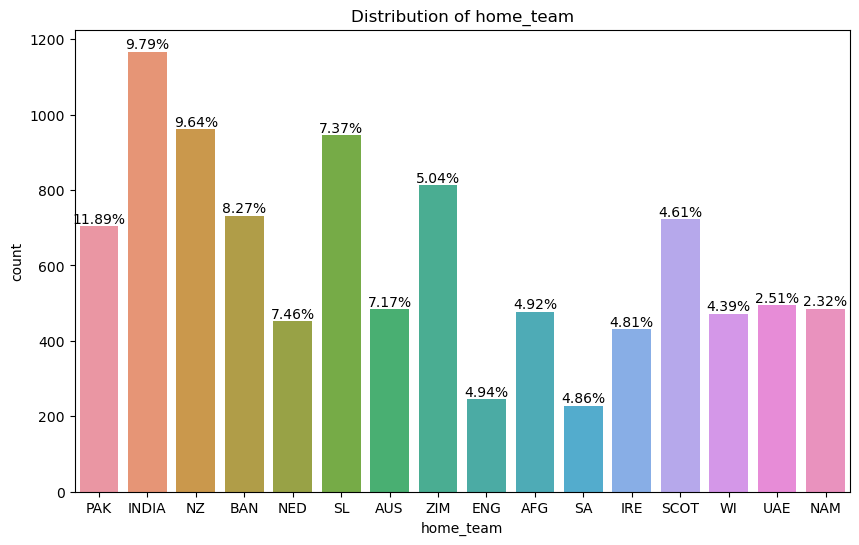

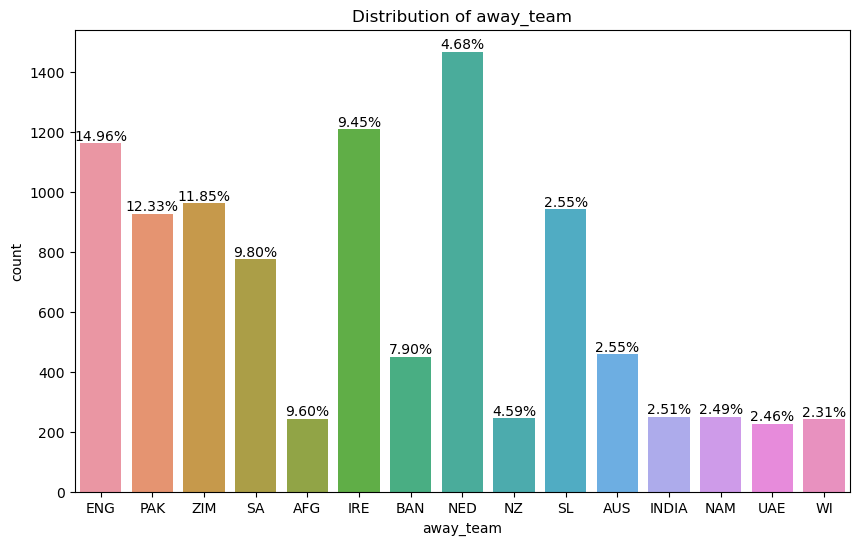

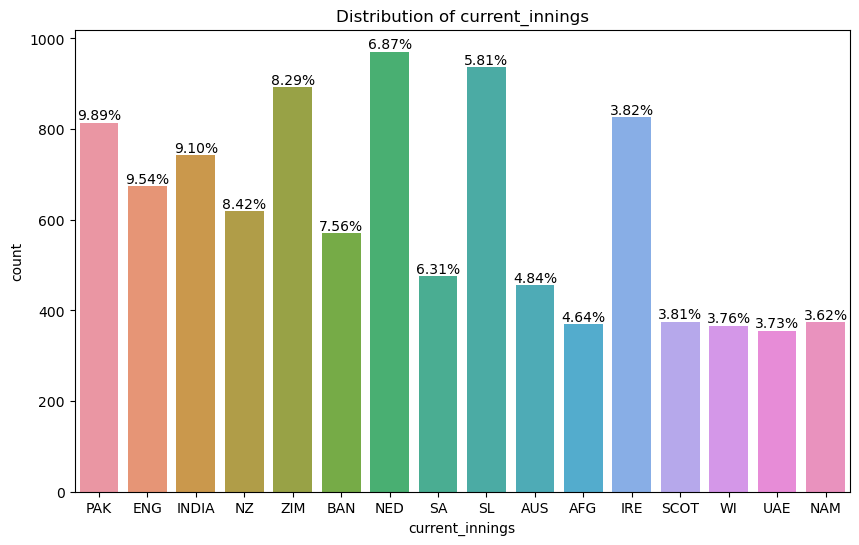

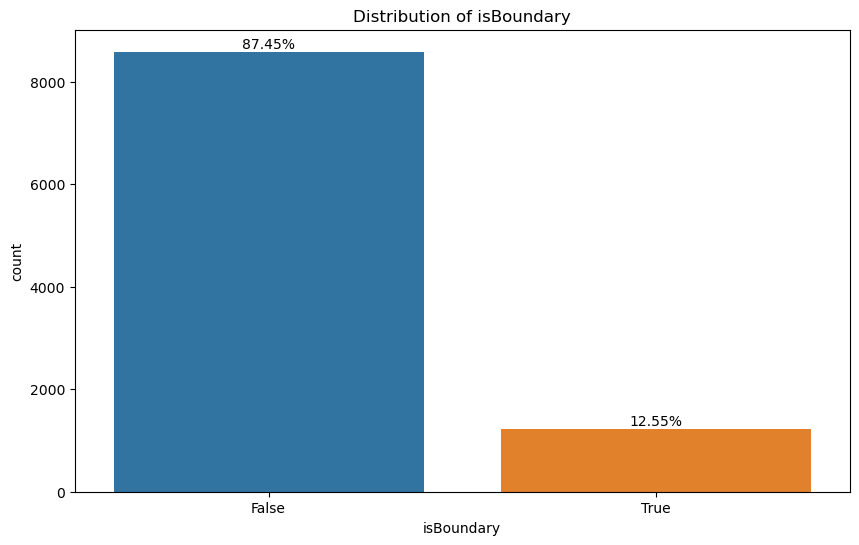

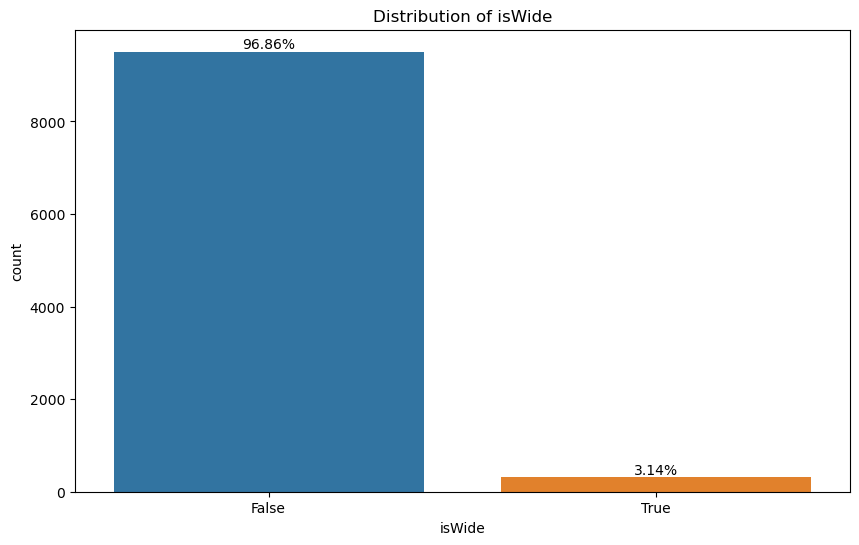

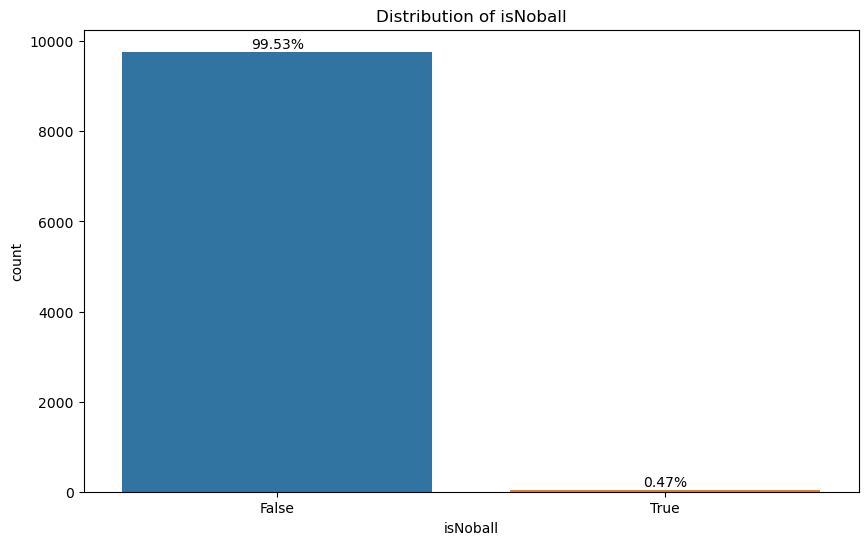

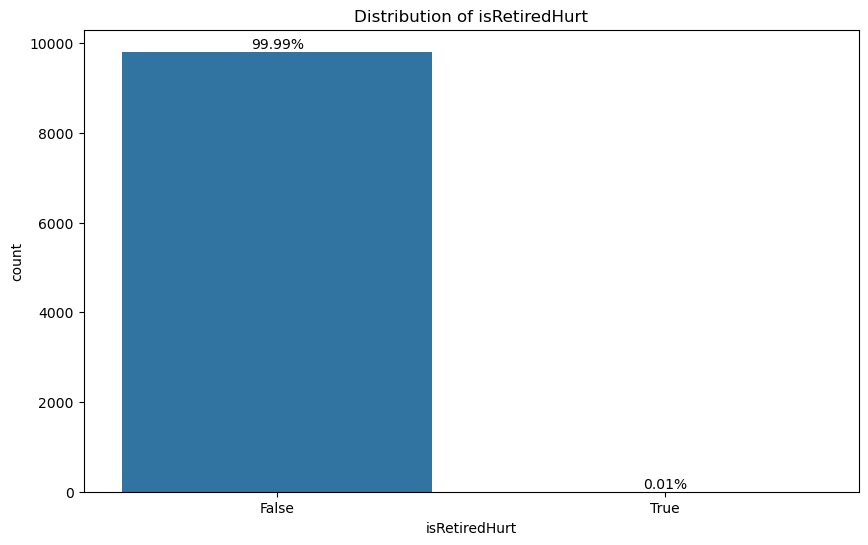

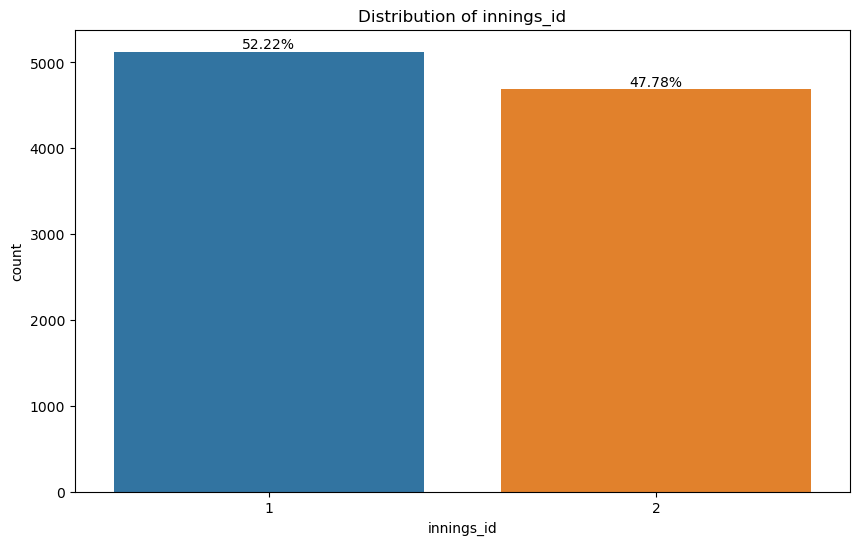

In [24]:
categorical_features_to_visualize = [
    
    col for col in categorical_features if col not in ['text', 'preText', 'postText','shortText']
    and not col.endswith('_name')  # Exclude player names using string ending
    
]
categorical_features_to_visualize.append('innings_id')
for feature in categorical_features_to_visualize:
  # Count plot
    plt.figure(figsize=(10, 6)) 
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    # Get counts and calculate percentages
    total = len(df)
    counts = df[feature].value_counts()
    percentages = (counts / total) * 100
    # Access bars using container objects (artist containers)
    bars = plt.gca().containers  # Get container objects from current axes
  
  # Loop through bars and percentages, add text labels
    for bar, p in zip(bars[0].patches, percentages):  # Assuming first container holds bars
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{p:.2f}%", ha='center', va='bottom')


    plt.show()


In [25]:
df['isRetiredHurt'].value_counts()

isRetiredHurt
False    9813
True        1
Name: count, dtype: int64

In [26]:
cat_vars=categorical_features_to_visualize
cat_vars

['home_team',
 'away_team',
 'current_innings',
 'isBoundary',
 'isWide',
 'isNoball',
 'isRetiredHurt',
 'innings_id']

**observations** there is just one isRetiredHurt and others is false
- higher number of isNoball false
-  higher number of isBoundry false and  isWide FAlse



In [37]:
numerical_vars = [ 'over', 'ball', 'runs',  'batsman1_runs','batsman1_balls',  'bowler1_overs', 'bowler1_maidens',
       'bowler1_runs', 'bowler1_wkts',  'batsman2_runs','batsman2_balls', 'bowler2_overs', 'bowler2_maidens', 'bowler2_runs',
       'bowler2_wkts']


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


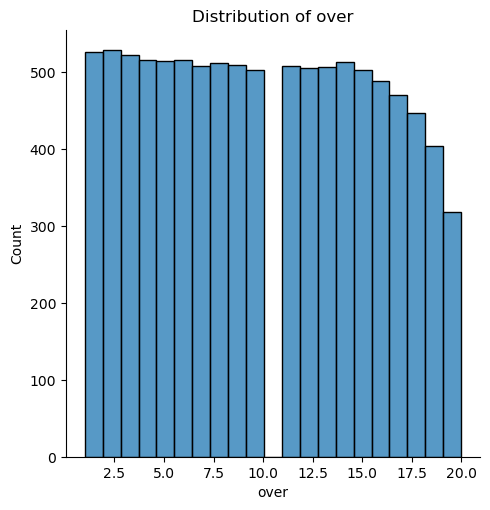

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


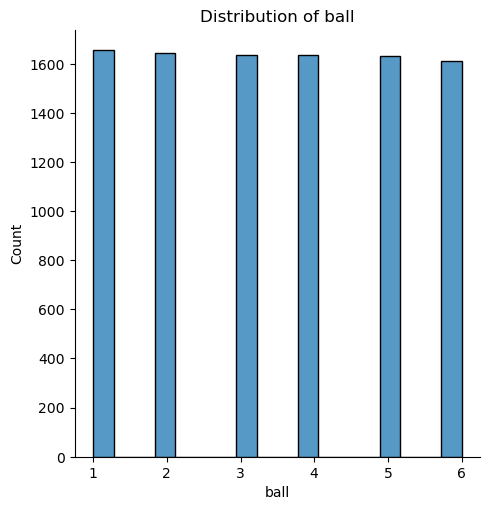

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


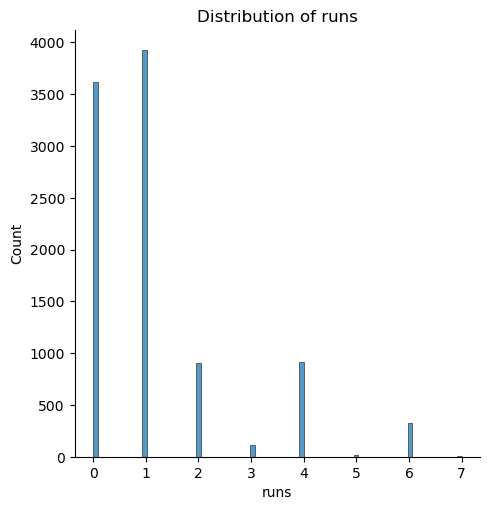

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


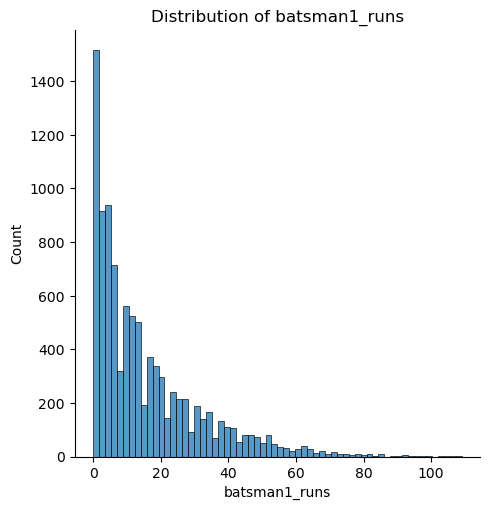

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


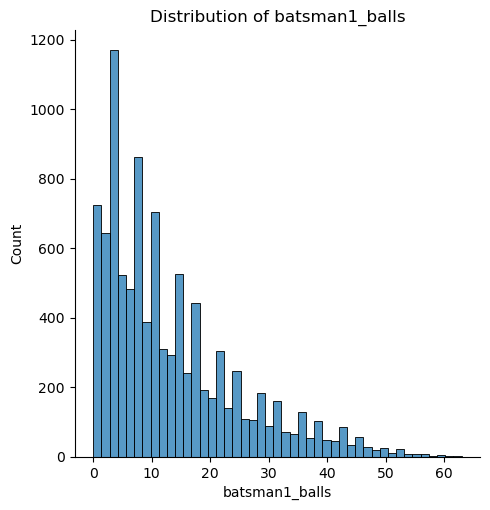

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


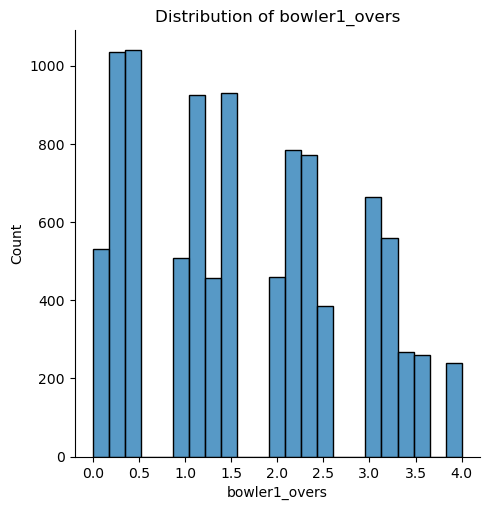

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


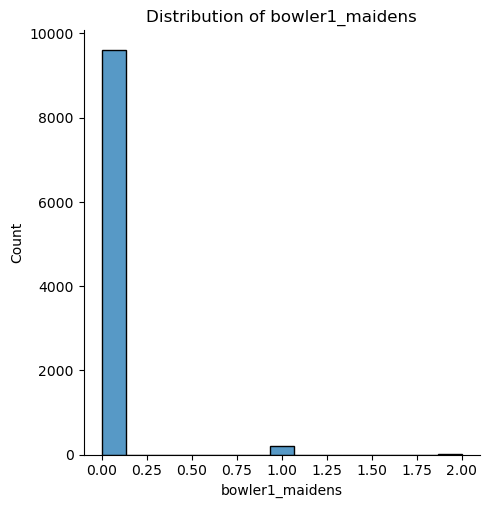

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


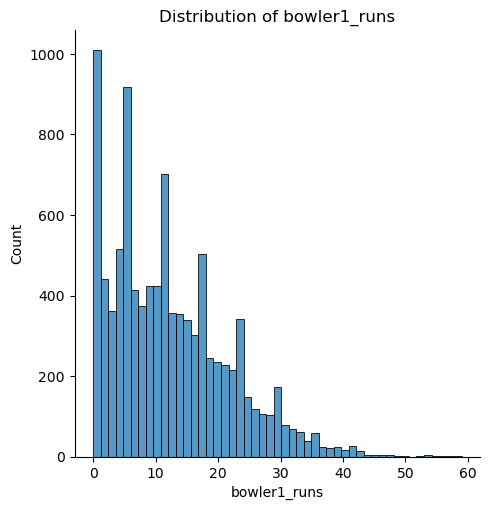

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


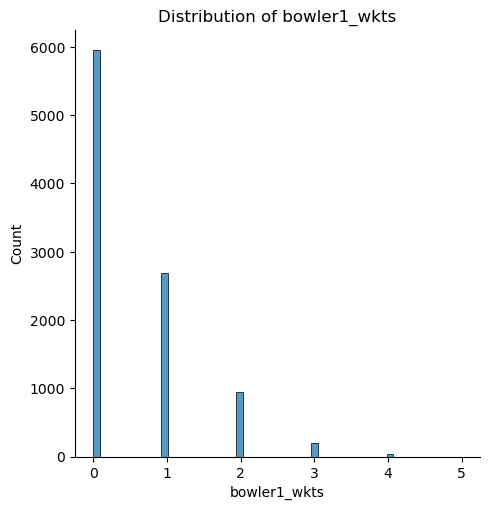

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


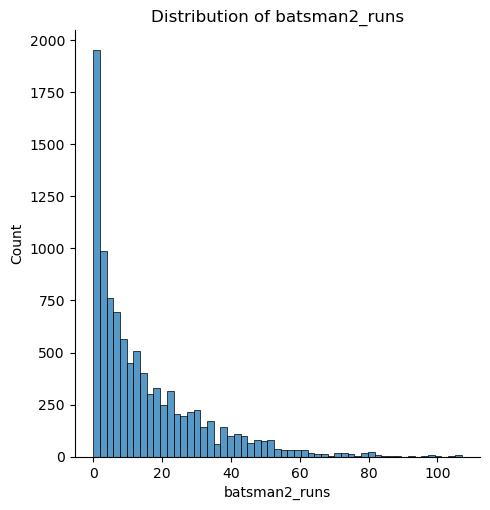

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


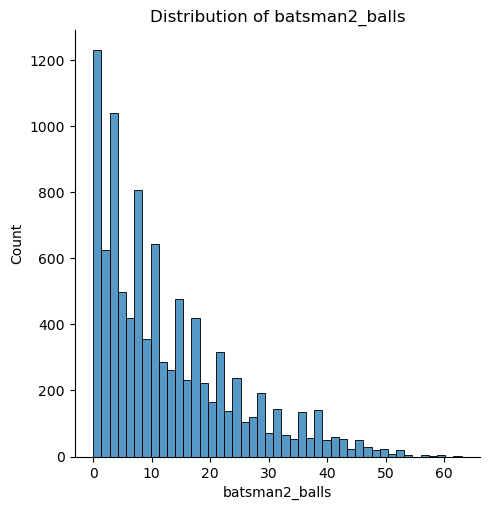

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


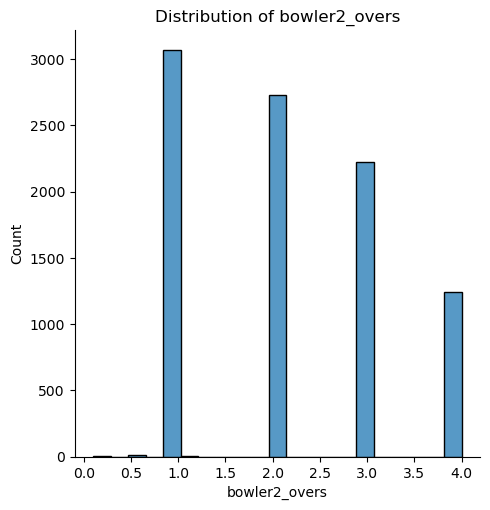

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


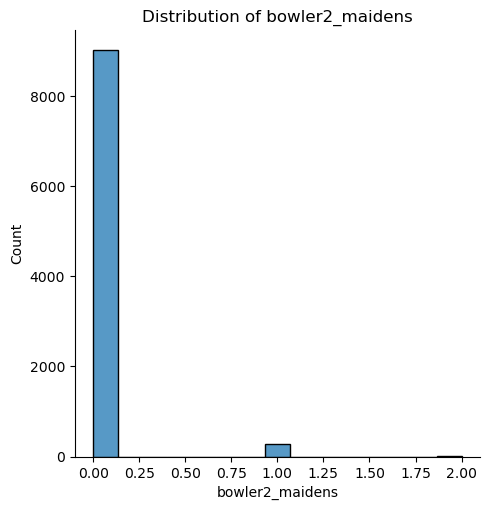

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


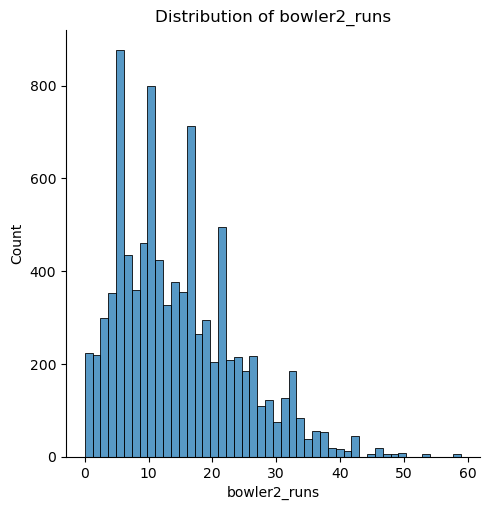

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


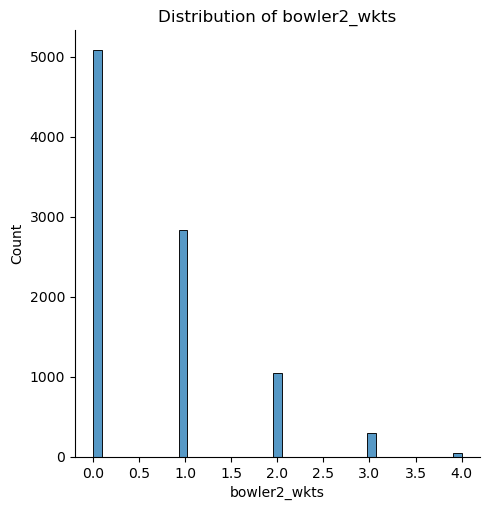

In [38]:
# Iterate through numerical features and create visualizations
for feature in numerical_vars:
    
  # Distribution Plot (Histogram by default)
    sns.displot(df[feature])  # Adjust arguments for specific plot types (e.g., kind="kde" for density plot)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()

 

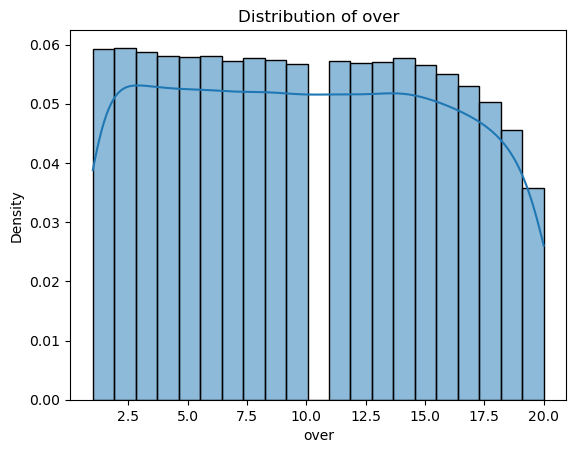

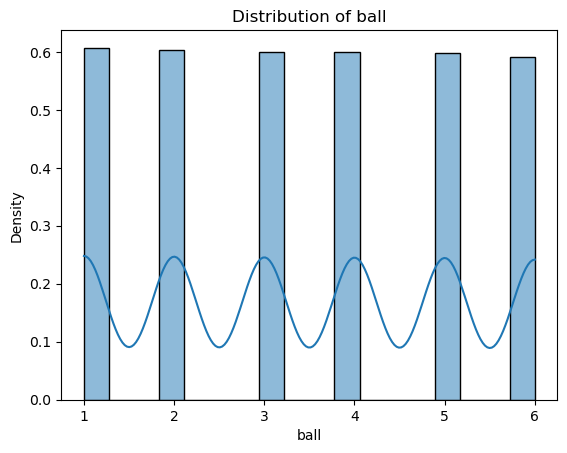

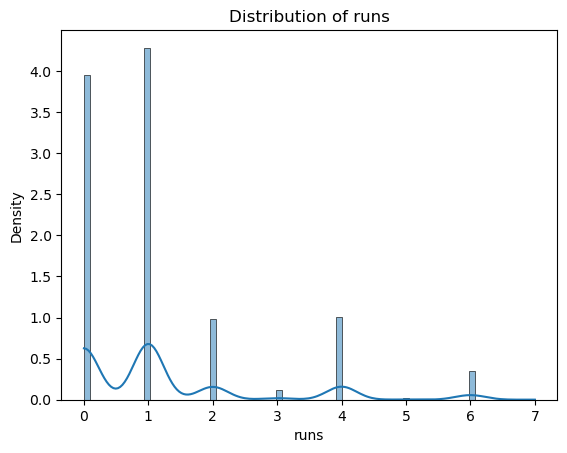

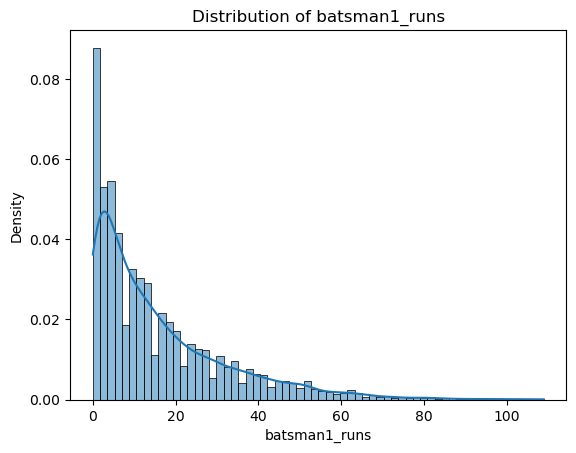

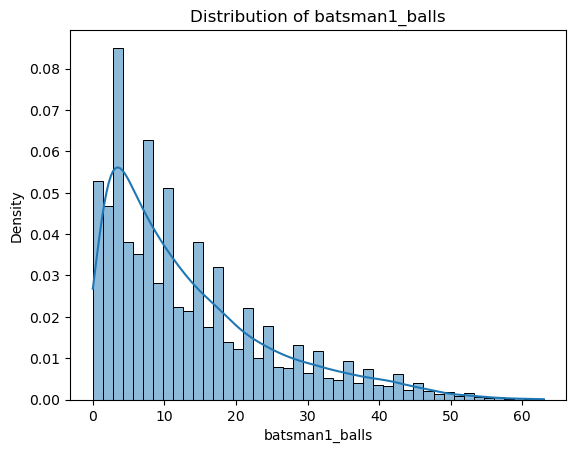

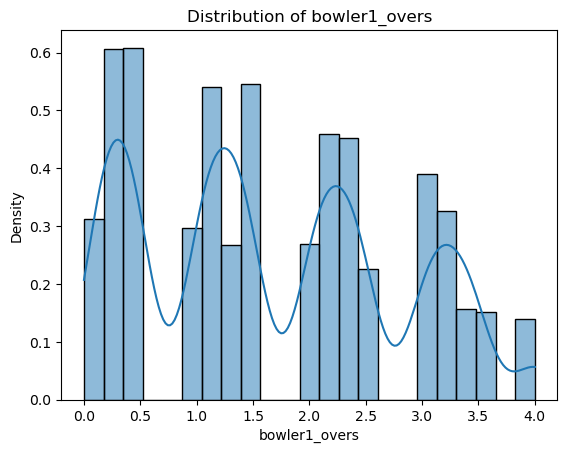

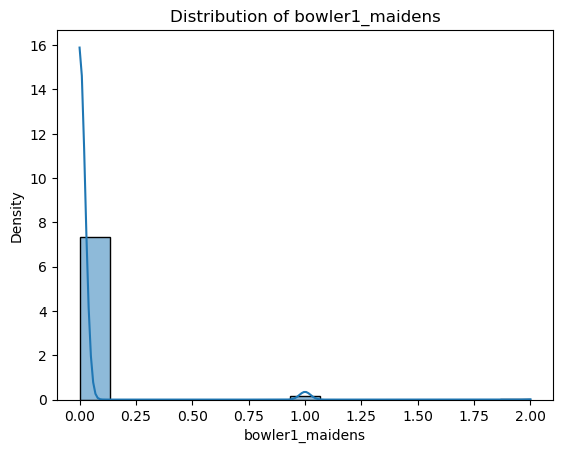

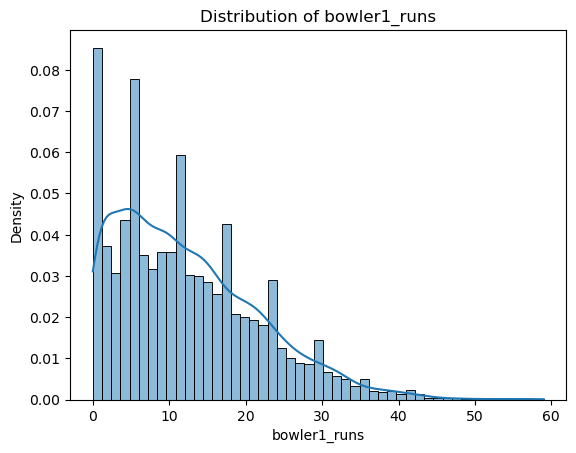

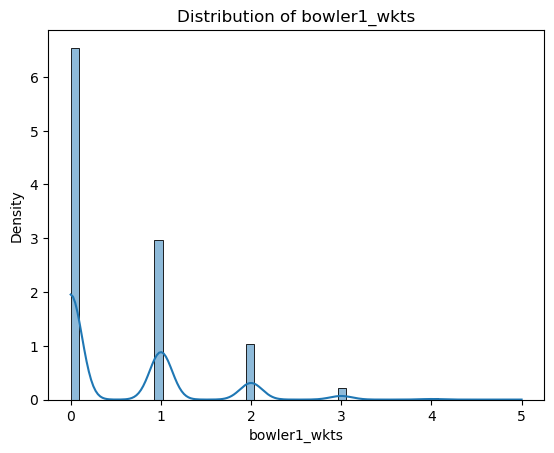

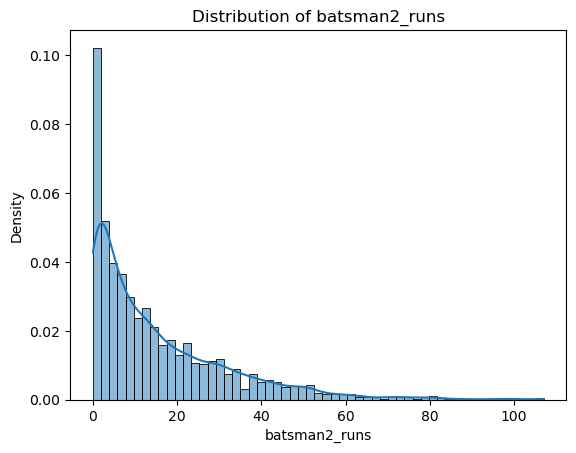

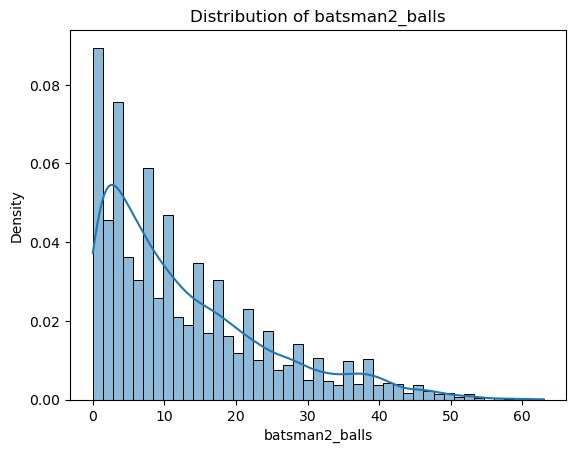

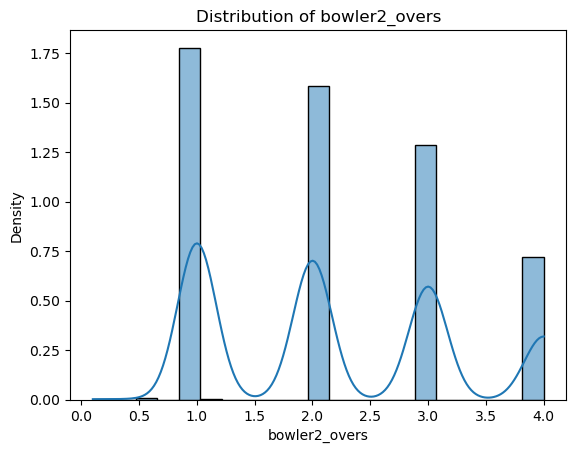

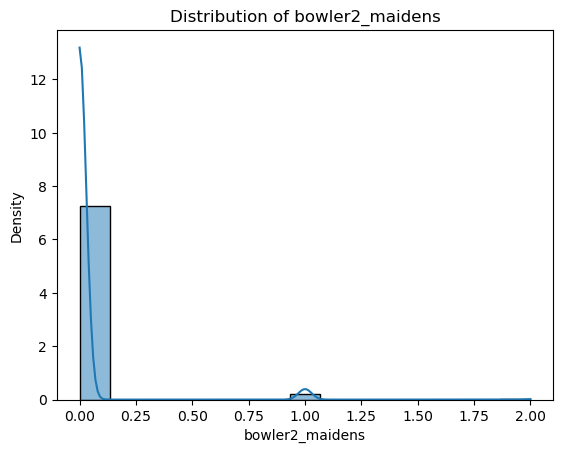

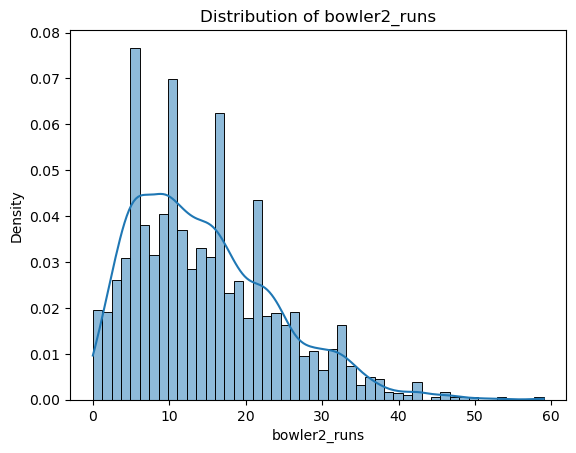

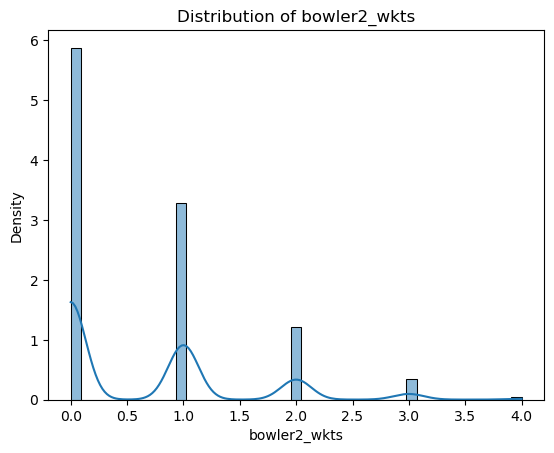

In [39]:
# Iterate through numerical features and create visualizations
for feature in numerical_vars:
    
    sns.histplot(df[feature],kde=True,stat='density') 
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()


In [40]:
#devide the numericals vars to discret and continus
discret_vars = [col for col in numerical_vars if df[col].dtype == 'int64']
discret_vars

['over',
 'ball',
 'runs',
 'batsman1_runs',
 'batsman1_balls',
 'bowler1_maidens',
 'bowler1_runs',
 'bowler1_wkts',
 'batsman2_runs',
 'batsman2_balls']

In [41]:
continus_vars = [col for col in numerical_vars if df[col].dtype == 'float64']
continus_vars

['bowler1_overs',
 'bowler2_overs',
 'bowler2_maidens',
 'bowler2_runs',
 'bowler2_wkts']

In [42]:
df[numerical_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   over             9814 non-null   int64  
 1   ball             9814 non-null   int64  
 2   runs             9814 non-null   int64  
 3   batsman1_runs    9814 non-null   int64  
 4   batsman1_balls   9814 non-null   int64  
 5   bowler1_overs    9814 non-null   float64
 6   bowler1_maidens  9814 non-null   int64  
 7   bowler1_runs     9814 non-null   int64  
 8   bowler1_wkts     9814 non-null   int64  
 9   batsman2_runs    9814 non-null   int64  
 10  batsman2_balls   9814 non-null   int64  
 11  bowler2_overs    9288 non-null   float64
 12  bowler2_maidens  9288 non-null   float64
 13  bowler2_runs     9288 non-null   float64
 14  bowler2_wkts     9288 non-null   float64
dtypes: float64(5), int64(10)
memory usage: 1.1 MB


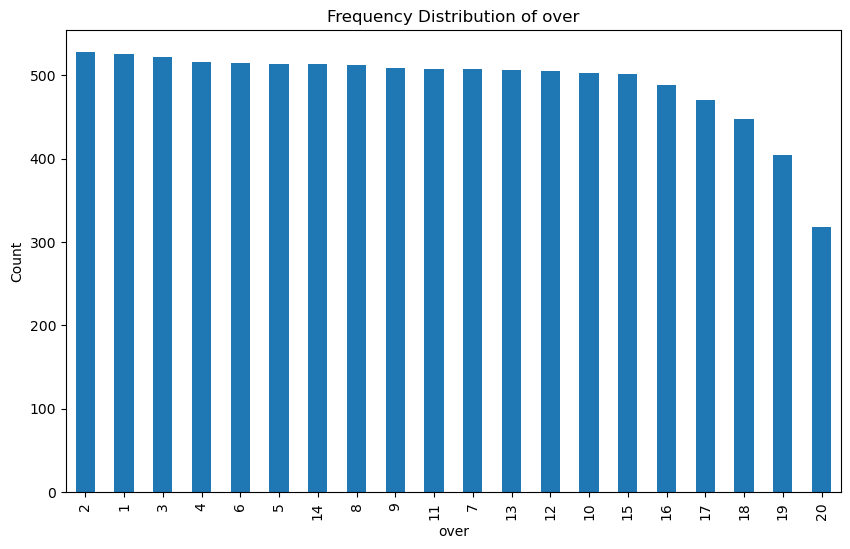

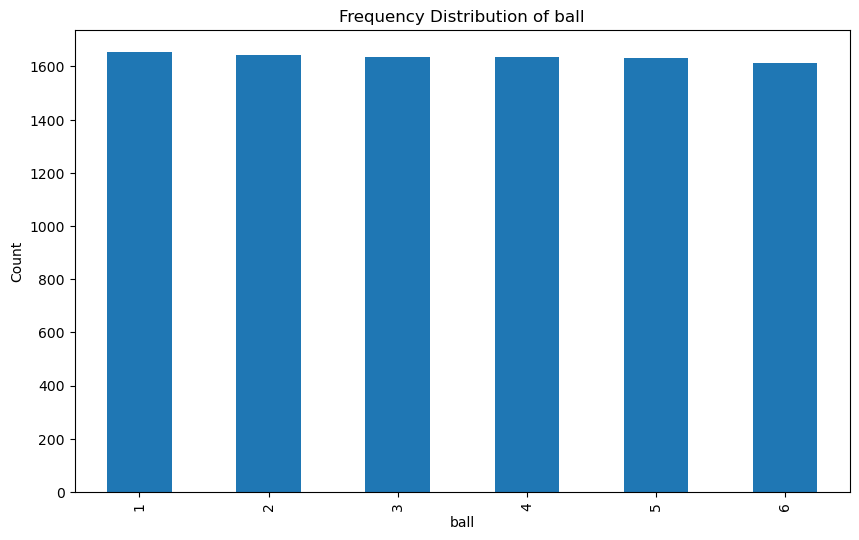

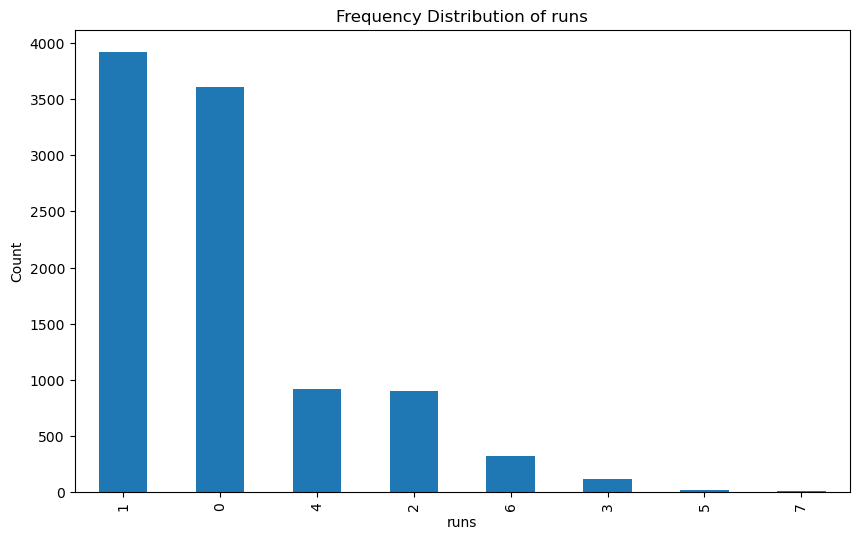

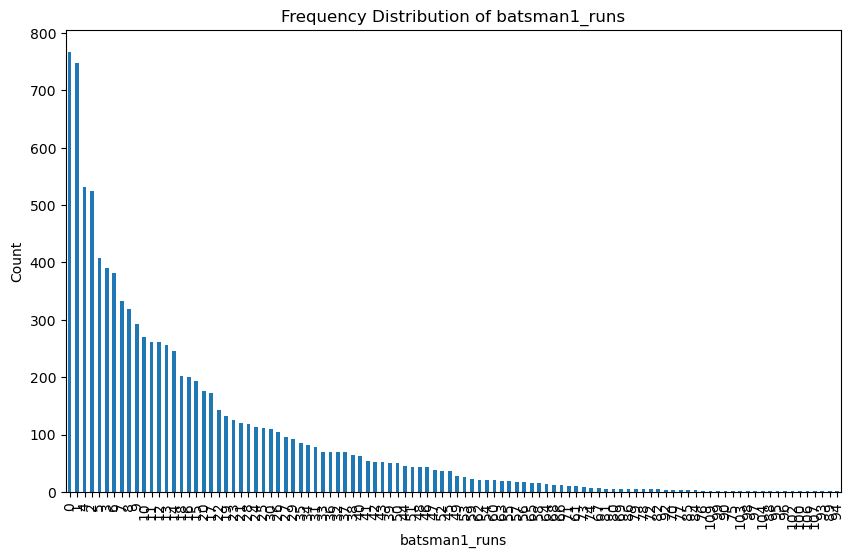

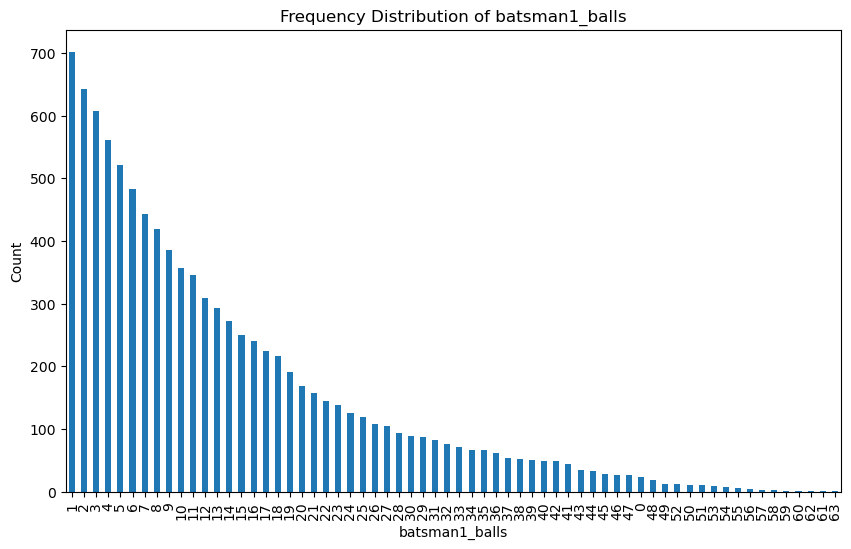

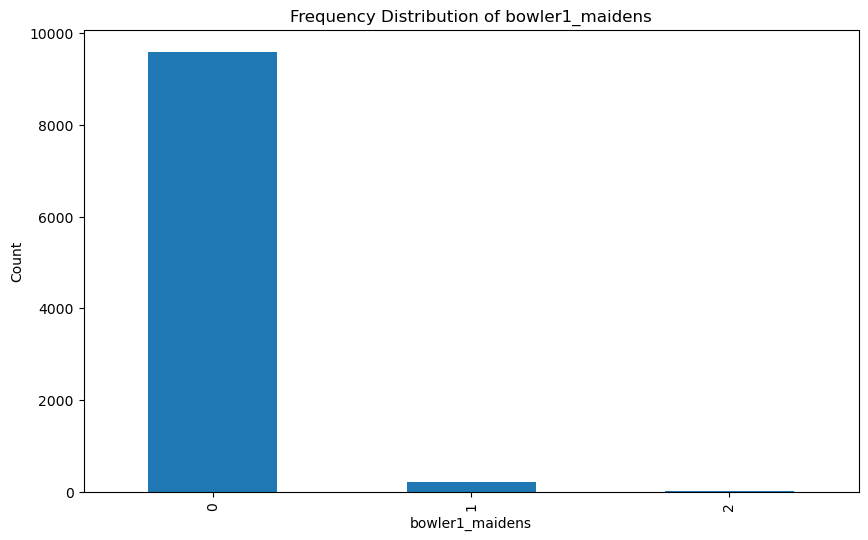

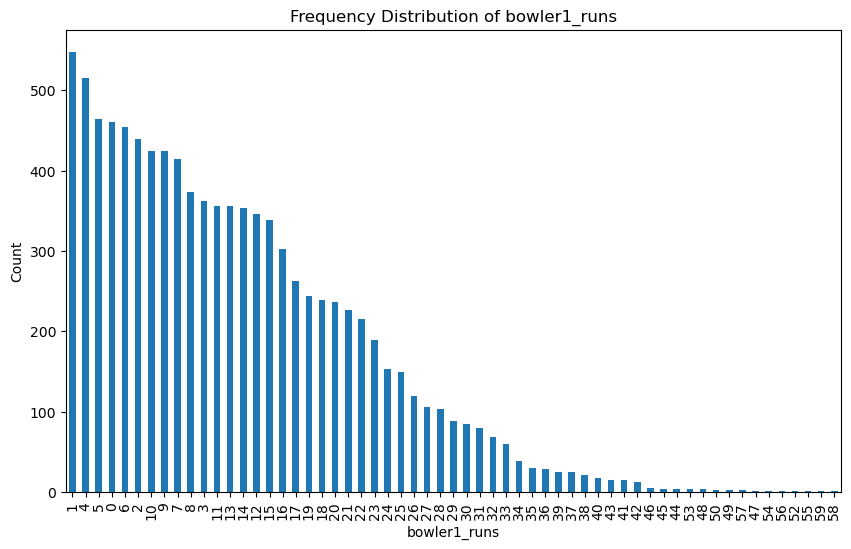

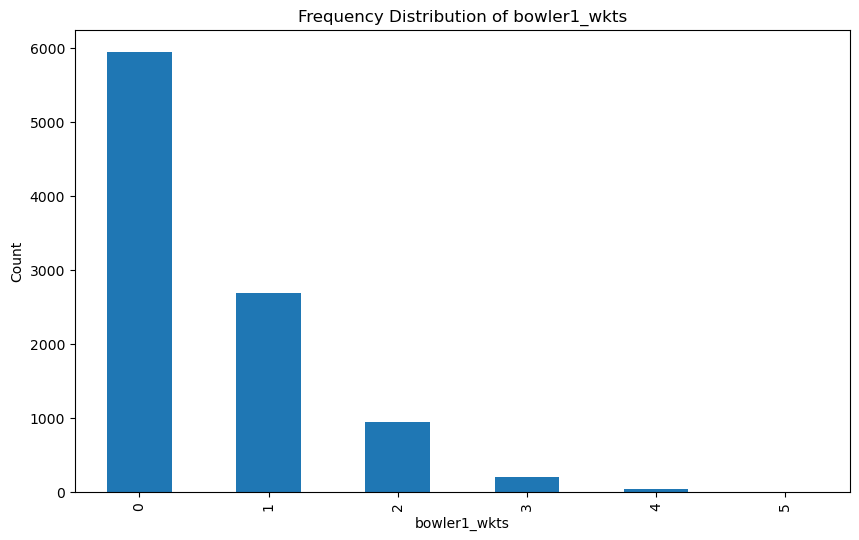

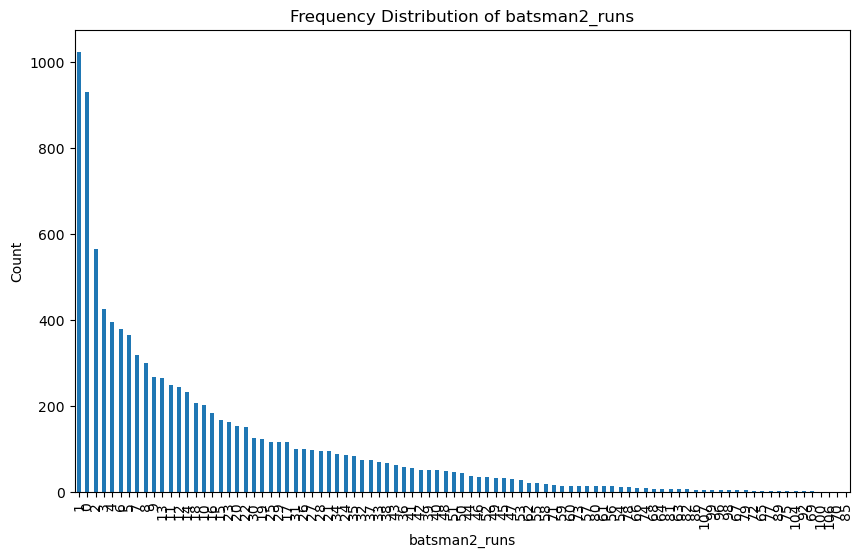

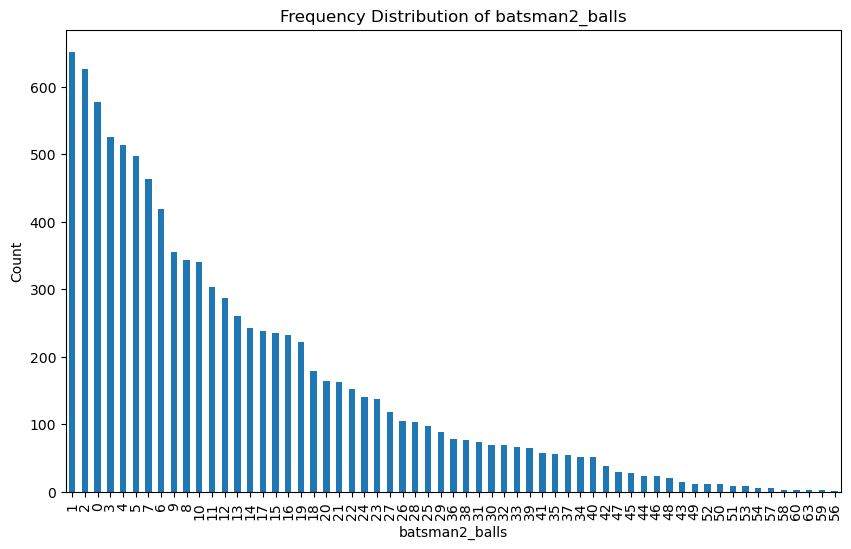

In [43]:
for var in discret_vars:
    plt.figure(figsize=(10, 6)) 
    df[var].value_counts().plot(kind='bar')
    plt.title(f"Frequency Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

In [1]:
corr = df[discret_vars].corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True)
plt.savefig('heatmap_discret_vars.png')
plt.show()


NameError: name 'df' is not defined

In [ ]:
corr = df[continus_vars].corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True)
plt.savefig('heatmap_continous_vars.png')

plt.show()

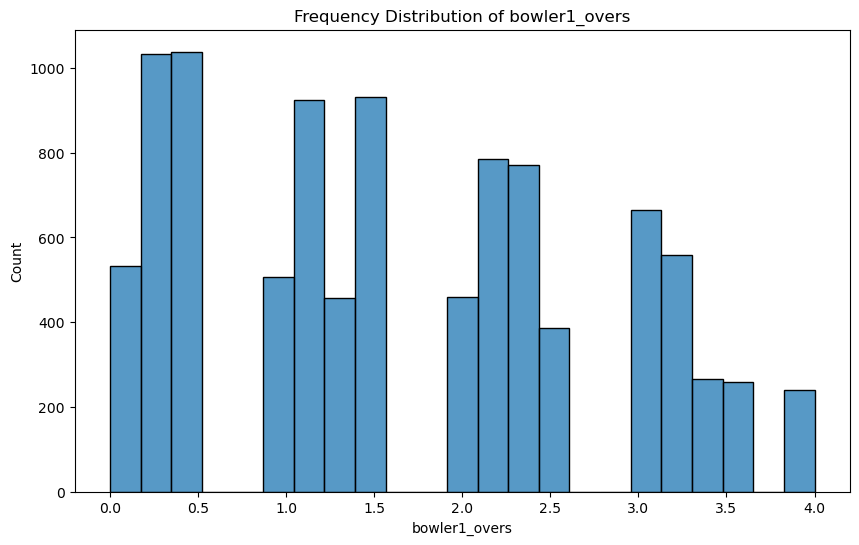

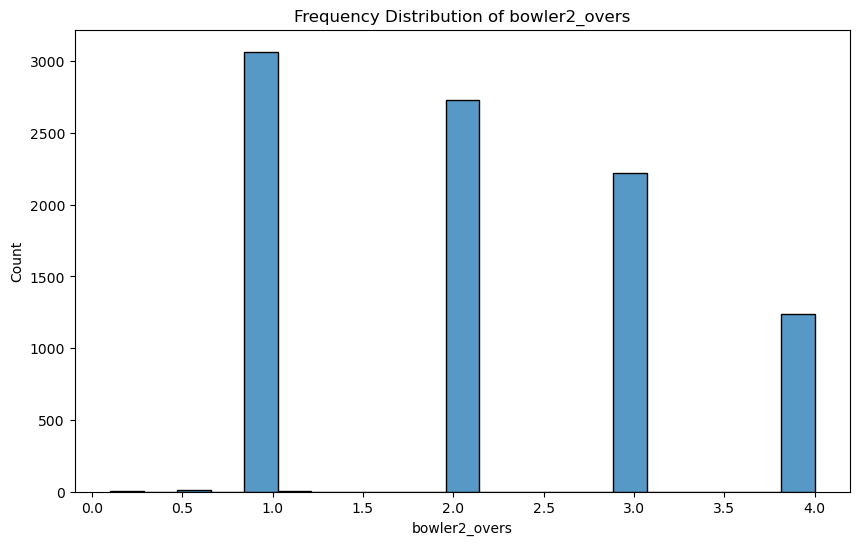

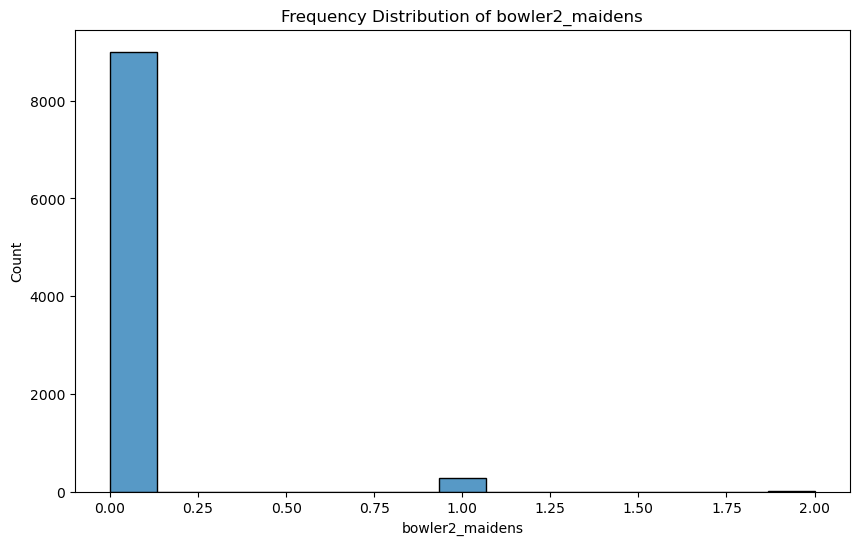

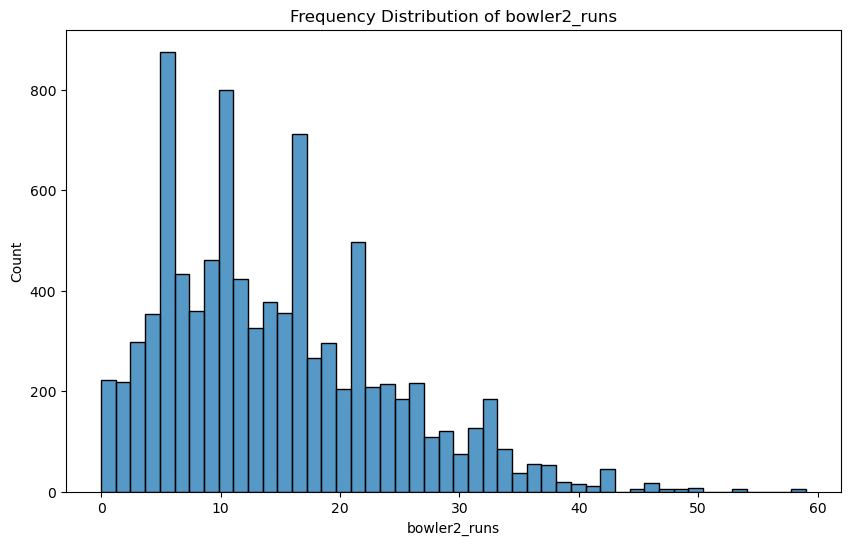

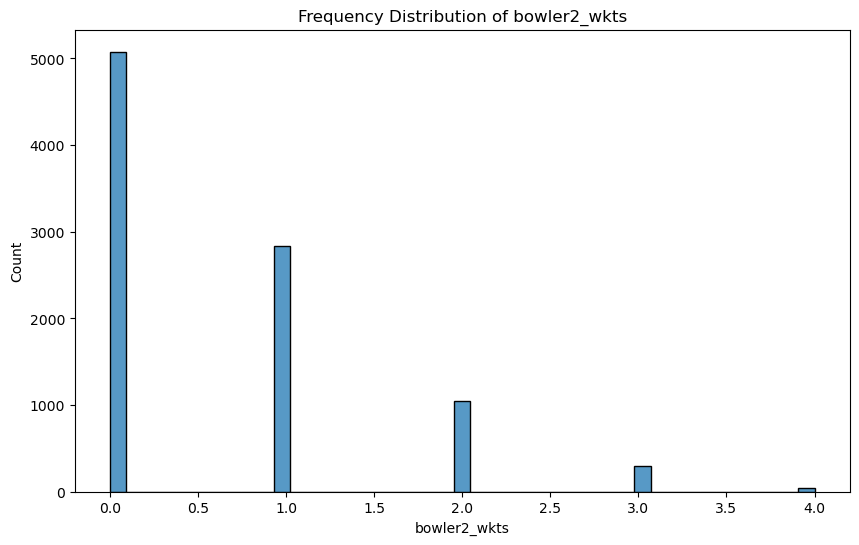

In [47]:
for var in continus_vars:
    plt.figure(figsize=(10, 6)) 
    sns.histplot(data=df,x=var)
    plt.title(f"Frequency Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

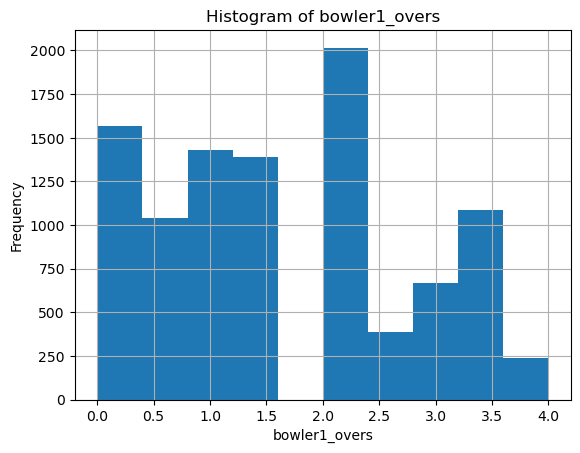

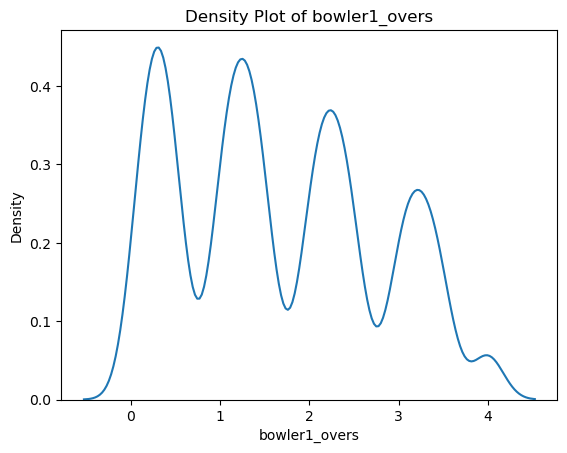

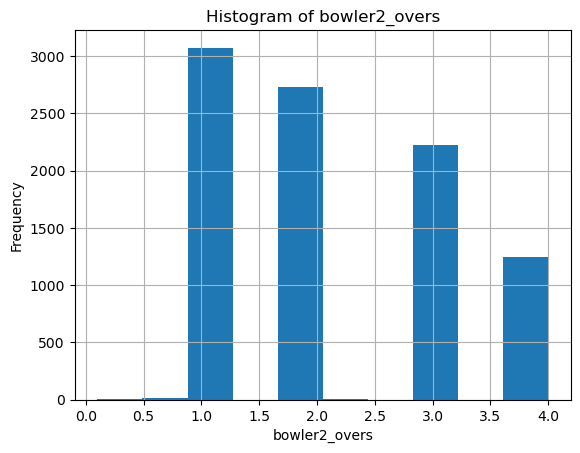

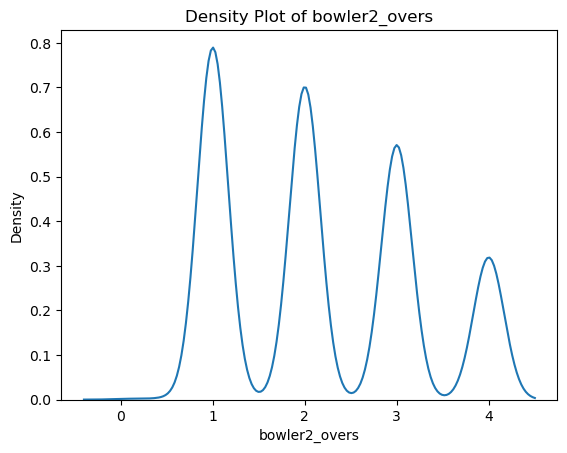

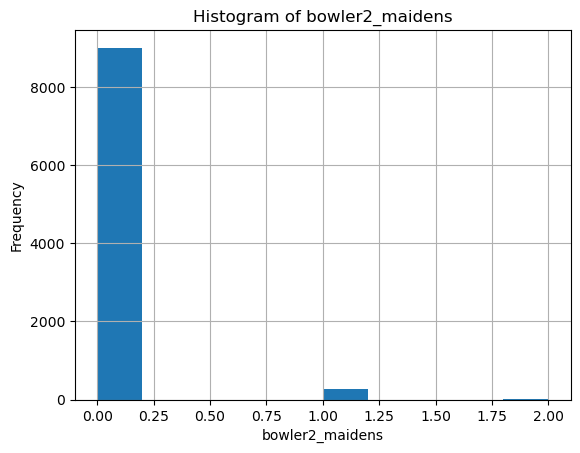

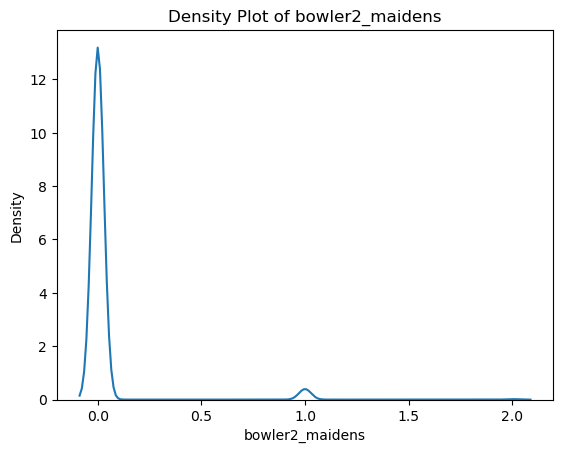

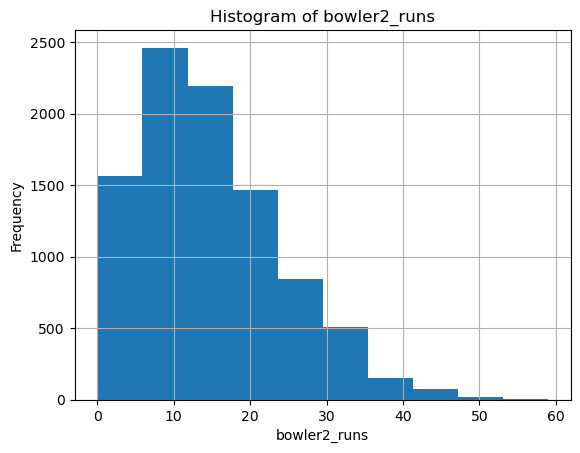

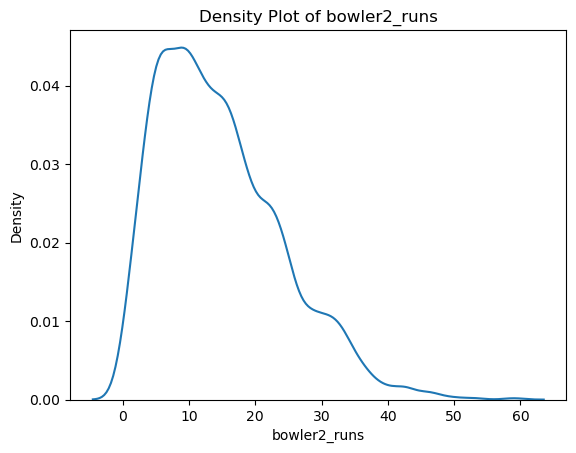

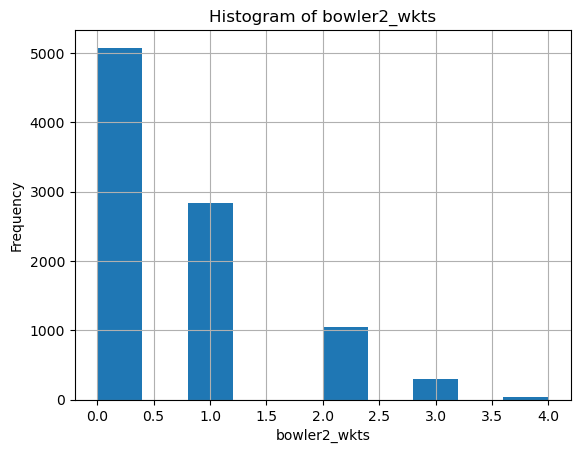

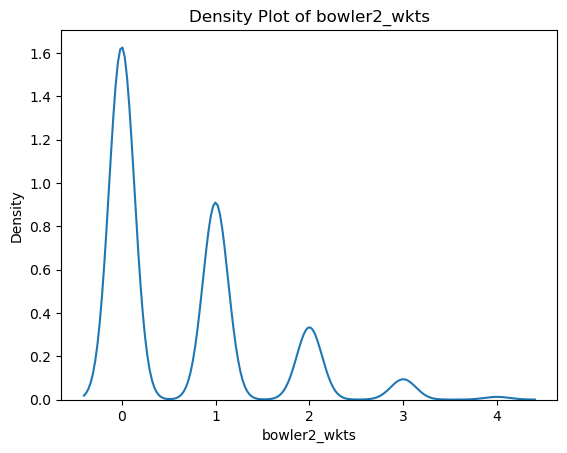

In [48]:
for var in continus_vars:
  # Histogram
    df[var].hist()
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

    # Density Plot
    sns.kdeplot(df[var])
    plt.title(f"Density Plot of {var}")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.show()

In [49]:
df[continus_vars].tail()

,bowler1_overs,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts
9809,3.2,4.0,0.0,26.0,2.0
9810,3.3,4.0,0.0,26.0,2.0
9811,3.4,4.0,0.0,26.0,2.0
9812,3.5,4.0,0.0,26.0,2.0
9813,4.0,4.0,0.0,26.0,2.0


In [50]:

has_decimals = df['bowler2_maidens'].dropna().apply(lambda x: abs(round(x) - x) > 0).any()
has_decimals

False

In [51]:
if not has_decimals:
    df['bowler2_maidens'] = df['bowler2_maidens'].dropna().astype('int64')
else:
    pass


In [52]:
df['bowler2_maidens']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9809    0.0
9810    0.0
9811    0.0
9812    0.0
9813    0.0
Name: bowler2_maidens, Length: 9814, dtype: float64

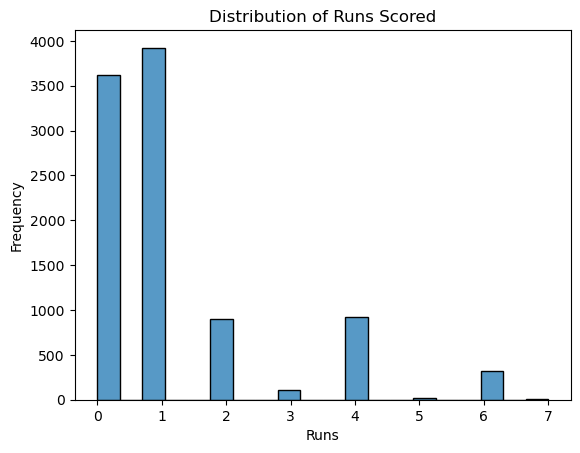

In [53]:
# Explore distribution of runs scored
sns.histplot(df['runs'], bins=20)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


In [54]:
# Analyze performance of different teams and players
team_performance = df.groupby('current_innings').agg({'runs': 'mean', 'bowler1_wkts': 'sum'}).reset_index()
print(team_performance)

   current_innings      runs  bowler1_wkts
0              AFG  1.135501           193
1              AUS  1.314286           235
2              BAN  1.166667           358
3              ENG  1.258160           243
4            INDIA  1.353100           364
5              IRE  1.265133           538
6              NAM  1.133690           247
7              NED  1.041195           533
8               NZ  1.379645           238
9              PAK  1.202703           390
10              SA  1.341053           227
11            SCOT  1.245333           185
12              SL  1.172009           525
13             UAE  0.932394           168
14              WI  1.120219           219
15             ZIM  1.131019           649


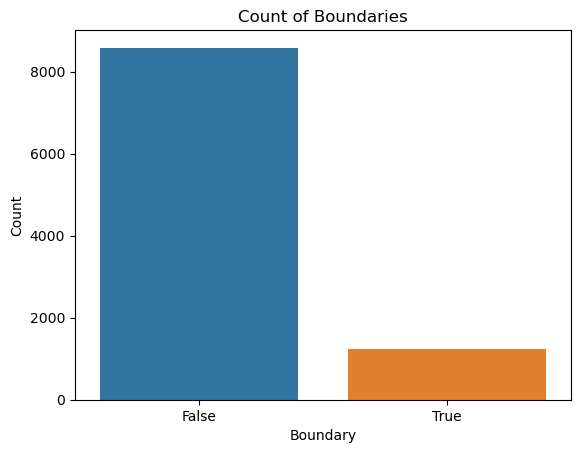

In [55]:
# Identify trends and patterns in match events
sns.countplot(df , x='isBoundary')
plt.title('Count of Boundaries')
plt.xlabel('Boundary')
plt.ylabel('Count')
plt.show()

In [ ]:
# Player Performance Analysis
# Analyze the performance of individual players
player_performance = df.groupby('batsman1_name').agg({'runs': 'sum', 'batsman1_runs': 'mean'}).reset_index()
print(player_performance.head())

In [56]:
# Team Performance Evaluation
# Evaluate the performance of teams
team_performance = df.groupby('current_innings').agg({'runs': 'mean', 'bowler1_wkts': 'sum'}).reset_index()
print(team_performance)


   current_innings      runs  bowler1_wkts
0              AFG  1.135501           193
1              AUS  1.314286           235
2              BAN  1.166667           358
3              ENG  1.258160           243
4            INDIA  1.353100           364
5              IRE  1.265133           538
6              NAM  1.133690           247
7              NED  1.041195           533
8               NZ  1.379645           238
9              PAK  1.202703           390
10              SA  1.341053           227
11            SCOT  1.245333           185
12              SL  1.172009           525
13             UAE  0.932394           168
14              WI  1.120219           219
15             ZIM  1.131019           649


In [57]:
data=df.copy(deep=True)

In [58]:
data.columns

Index(['home_team', 'away_team', 'current_innings', 'innings_id', 'over',
       'ball', 'runs', 'shortText', 'isBoundary', 'isWide', 'isNoball',
       'batsman1_id', 'batsman1_name', 'batsman1_runs', 'batsman1_balls',
       'bowler1_id', 'bowler1_name', 'bowler1_overs', 'bowler1_maidens',
       'bowler1_runs', 'bowler1_wkts', 'batsman2_id', 'batsman2_name',
       'batsman2_runs', 'batsman2_balls', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'isRetiredHurt',
       'text', 'preText', 'postText'],
      dtype='object')

In [59]:
selected_features = ['home_team', 'away_team', 'current_innings', 'innings_id', 
       'ball',   'isBoundary', 'isWide', 'isNoball',
        'batsman1_runs', 'batsman1_balls',
        'bowler1_overs', 'bowler1_maidens',
       'bowler1_runs', 'bowler1_wkts',
       'batsman2_runs', 'batsman2_balls',  'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'isRetiredHurt'
    ]

# Remove unnecessary columns
data = data[selected_features]

# Check the updated columns
print(data.columns)

Index(['home_team', 'away_team', 'current_innings', 'innings_id', 'ball',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_runs', 'batsman1_balls',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_runs', 'batsman2_balls', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'isRetiredHurt'],
      dtype='object')


In [60]:
X=data.drop('isBoundary',axis=1)
y=data['isBoundary']

In [61]:


# Separate categorical and numerical features
categorical_features = ['home_team', 'away_team', 'current_innings']
numerical_features = [col for col in data.columns if col not in categorical_features and col != 'isBoundary']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [62]:
 #Combine preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [63]:
# Create the pipeline with preprocessing and model steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data using the pipeline
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.model_selection import cross_val_score

# Define a dictionary of models with hyperparameters
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

# Find the best-performing model
best_model = max(results, key=results.get)
best_score = results[best_model]

print("Best Model:", best_model)
print("Mean Accuracy:", best_score)

Best Model: SVM
Mean Accuracy: 0.8727550710124186


In [65]:
best_model = SVC()
best_model.fit(X_train, y_train)

SVC()

In [66]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8797758532857871
Classification Report:
               precision    recall  f1-score   support

       False       0.88      1.00      0.94      1728
        True       0.33      0.00      0.01       235

    accuracy                           0.88      1963
   macro avg       0.61      0.50      0.47      1963
weighted avg       0.82      0.88      0.82      1963



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize SVM classifier
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
